In [8]:
import cv2
import numpy as np
import glob
import os
import sys

In [55]:
canny_2 = (50, 90)#(50, 150)
HoughLinesP = (1, np.pi/180, 8, 10, 10)#(1, np.pi/180, 8, 10, 10)
debug = True

In [10]:
sys.path.append('..')
from local_package.Cropping import trim_to_edges

In [ ]:
def trim_to_edges(image, img_name): # moved to local_packages.Cropping
    if not img_name.startswith('19_'):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        if img_name.startswith('8_'):
            edges = cv2.Canny(gray, 10, 32)
        else:
            #print(canny_2)
            #edges = cv2.Canny(gray, canny_2[0], canny_2[1])
            edges = cv2.Canny(gray, 50, 90)#(50, 150)
            if debug:
                cv2.imshow('edges', edges)
        lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=8, minLineLength=10, maxLineGap=10)
        #lines = cv2.HoughLinesP(edges, HoughLinesP[0], HoughLinesP[1], threshold=HoughLinesP[2], minLineLength=HoughLinesP[3], maxLineGap=HoughLinesP[4])
        canvas_edges = []
        for line in lines:
            x1, y1, x2, y2 = line[0]
            canvas_edges.append((x1, y1))
            canvas_edges.append((x2, y2))

        # Find the bounding rectangle of the canvas edges
        x, y, w, h = cv2.boundingRect(np.array(canvas_edges))

        # Crop the image to the bounding rectangle
        if img_name.startswith('5_'):
            top_left = (x+int(len(image[0])/600), y+int(len(image[0])/600))
            top_right = (x+w-int(len(image[0])/600), y+int(len(image[0])/600))
            bottom_left = (x+int(len(image[0])/600), y+h-int(len(image[0])/600))
            bottom_right = (x+w-int(len(image[0])/600), y+h-int(len(image[0])/600))
        elif img_name.startswith('6_'):
            top_left = (x-int(len(image[0])/300), y+int(len(image[0])/300))
            top_right = (x+w-int(len(image[0])/600), y+int(len(image[0])/300))
            bottom_left = (x-int(len(image[0])/300), y+h-int(len(image[0])/300))
            bottom_right = (x+w-int(len(image[0])/600), y+h-int(len(image[0])/300))
        elif img_name.startswith('7_') or img_name.startswith('12_'):
            top_left = (x+int(len(image[0])/200), y+int(len(image[0])/200))
            top_right = (x+w-int(len(image[0])/70), y+int(len(image[0])/200))
            bottom_left = (x+int(len(image[0])/200), y+h-int(len(image[0])/150))
            bottom_right = (x+w-int(len(image[0])/70), y+h-int(len(image[0])/150))
        elif img_name.startswith('8_'):
            top_left = (x, y+int(len(image[0])/600))
            top_right = (x+w, y+int(len(image[0])/600))
            bottom_left = (x, y+h)
            bottom_right = (x+w, y+h)
        elif img_name.startswith('9_') or img_name.startswith('11_'):
            top_left = (x+int(len(image[0])/600), y+int(len(image[0])/400))
            top_right = (x+w-int(len(image[0])/600), y+int(len(image[0])/400))
            bottom_left = (x+int(len(image[0])/600), y+h-int(len(image[0])/600))
            bottom_right = (x+w-int(len(image[0])/600), y+h-int(len(image[0])/600))
        elif img_name.startswith('10_') or img_name.startswith('13_'):
            top_left = (x+int(len(image[0])/600), y+int(len(image[0])/600))
            top_right = (x+w-int(len(image[0])/600), y+int(len(image[0])/600))
            bottom_left = (x+int(len(image[0])/600), y+h-int(len(image[0])/600))
            bottom_right = (x+w-int(len(image[0])/600), y+h-int(len(image[0])/600))
        elif img_name.startswith('18_'):
            top_left = (x+int(len(image[0])/300), y+int(len(image[0])/300))
            top_right = (x+w-int(len(image[0])/300), y+int(len(image[0])/300))
            bottom_left = (x+int(len(image[0])/300), y+h-int(len(image[0])/300))
            bottom_right = (x+w-int(len(image[0])/300), y+h-int(len(image[0])/300))
        else:
            top_left = (x, y)
            top_right = (x+w, y)
            bottom_left = (x, y+h)
            bottom_right = (x+w, y+h)

        if img_name.startswith('20_'):
            image = crop_with_perspective(image, top_left, top_right, bottom_left, bottom_right)
    
    if img_name.startswith('19_') or img_name.startswith('20_'):
        # stratch the image perspective to remove white pixels
        # look through pixels from the corners and find the first non-white pixel
        #image = cv2.resize(image, (0, 0), fx=2, fy=2)
        
        def get_corners(image, MAX_RANGE_DEV=50):
            x_margin = len(image[0])/MAX_RANGE_DEV
            y_margin = len(image)/MAX_RANGE_DEV
            white_color_threshold = 200

            top_left, top_right, bottom_left, bottom_right = None, None, None, None
            # top left
            for y in range(int(y_margin)):
                for x in range(int(x_margin)):
                    #print(x, y, image[y, x])
                    if not all([i > white_color_threshold for i in image[y, x]]) and x < x_margin and y < y_margin:
                        top_left = (x, y)
                        break
                else:
                    continue
                break
            # bottom left
            for y in range(len(image)-1, int(y_margin), -1):
                for x in range(int(x_margin)):
                    #print(x, y, image[y, x])
                    if not all([i > white_color_threshold for i in image[y, x]]) and x < x_margin and y > len(image)-y_margin:
                        bottom_left = (x, y)
                        break
                else:
                    continue
                break
            # top right
            for x in range(len(image[0])-1, int(x_margin), -1):
                for y in range(int(y_margin)):
                    #print(x, y, image[y, x])
                    if not all([i > white_color_threshold for i in image[y, x]]) and x > len(image[0])-x_margin and y < y_margin:
                        top_right = (x, y)
                        break
                else:
                    continue
                break
            # bottom right
            for x in range(len(image[0])-1, int(x_margin), -1):
                for y in range(len(image)-1, int(y_margin), -1):
                    #print(x, y, image[y, x])
                    if not all([i > white_color_threshold for i in image[y, x]]) and x > len(image[0])-x_margin and y > len(image)-y_margin:
                        bottom_right = (x, y)
                        break
                else:
                    continue
                break

            return top_left, top_right, bottom_left, bottom_right
        if img_name.startswith('20_'):
            tmp_top_left, tmp_top_right, tmp_bottom_left, tmp_bottom_right = get_corners(image)
            if None in [tmp_top_left, tmp_top_right, tmp_bottom_left, tmp_bottom_right]:
                tmp_top_left, tmp_top_right, tmp_bottom_left, tmp_bottom_right = get_corners(image, MAX_RANGE_DEV=30)
            if None in [tmp_top_left, tmp_top_right, tmp_bottom_left, tmp_bottom_right]:
                raise Exception(f'Error for {img_name}: Could not find corners with perspective stretching.')
            # find the points for the source image based on the corners
            new_top_left, new_top_right, new_bottom_left, new_bottom_right = [0, 0], [0, 0], [0, 0], [0, 0]
            new_top_left[0] = top_left[0] + tmp_top_left[0]
            new_top_left[1] = top_left[1] + tmp_top_left[1]
            new_top_right[0] = top_right[0]-len(image[0])+tmp_top_right[0]
            new_top_right[1] = top_right[1] + tmp_top_right[1]
            new_bottom_left[0] = bottom_left[0] + tmp_bottom_left[0]
            new_bottom_left[1] = bottom_left[1]-len(image)+tmp_bottom_left[1]
            new_bottom_right[0] = bottom_right[0]-len(image[0])+tmp_bottom_right[0]
            new_bottom_right[1] = bottom_right[1]-len(image)+tmp_bottom_right[1]
        else:
            top_left, top_right, bottom_left, bottom_right = get_corners(image)
            if None in [top_left, top_right, bottom_left, bottom_right]:
                top_left, top_right, bottom_left, bottom_right = get_corners(image, MAX_RANGE_DEV=30)
            if None in [top_left, top_right, bottom_left, bottom_right]:
                raise Exception(f'Error for {img_name}: Could not find corners with perspective stretching.')

    if img_name.startswith('0_'):
        top_left = (top_left[0], 0)
        top_right = (len(image[0]), 0)
        bottom_right = (len(image[0]), bottom_right[1])

    return top_left, top_right, bottom_left, bottom_right


def crop_with_perspective(image, top_left, top_right, bottom_left, bottom_right):
    #crop image to the corners
    #image = image[top_left[1]:bottom_left[1], top_left[0]:top_right[0]]
    pts1 = np.float32([top_left, top_right, bottom_right, bottom_left])
    pts2 = np.float32([[0,0],[len(image[0]),0],[len(image[0]),len(image)],[0,len(image)]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    # view the image with the perspective lines
    if debug:
        cv2.polylines(image, [np.int32(pts1)], True, (0, 255, 0), 3)    

    image = cv2.warpPerspective(image,M,(len(image[0]),len(image)))
    return image

In [56]:
image = cv2.imread('../scrapped_images1/0_1234.jpg')
print(image.shape)
if image.shape[0] < 1024 or image.shape[1] < 1024:
    image = cv2.resize(image, (0, 0), fx=2, fy=2)
    # sharpen the image
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    image = cv2.filter2D(image, -1, kernel)


top_left, top_right, bottom_left, bottom_right = trim_to_edges(image, '0_48.jpg')
cropped = crop_with_perspective(image, top_left, top_right, bottom_left, bottom_right)
#cropped = image[top_left[1]:bottom_left[1], top_left[0]:top_right[0]]
# draw the corners
cv2.circle(image, top_left, 5, (0, 0, 255), -1)
cv2.circle(image, top_right, 5, (0, 0, 255), -1)
cv2.circle(image, bottom_left, 5, (0, 0, 255), -1)
cv2.circle(image, bottom_right, 5, (0, 0, 255), -1)



cv2.imshow('cropped', image if debug else cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

(378, 498, 3)


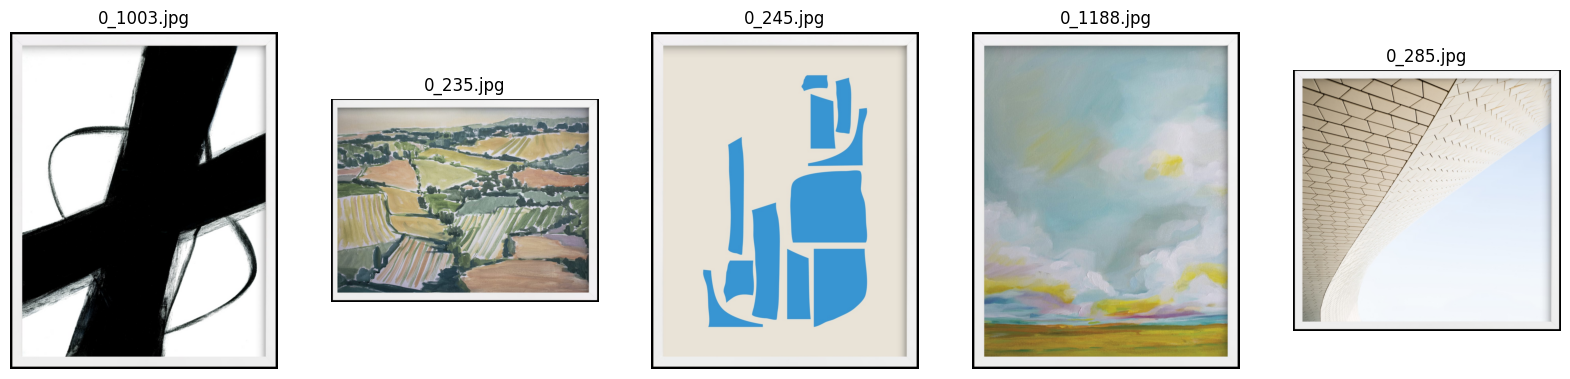

In [60]:
import random

import matplotlib.pyplot as plt

debug = False

# Function to display images
def display_images(images, titles=None):
    n = len(images)
    plt.figure(figsize=(20, 10))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Pick random images starting with '0_'
directory = '../scrapped_images1/'
image_files = [f for f in os.listdir(directory) if f.startswith('0_')]
random_images = random.sample(image_files, min(5, len(image_files)))

# Process and display the images
cropped_images = []
for file_name in random_images:
    file_path = os.path.join(directory, file_name)
    image = cv2.imread(file_path)
    top_left, top_right, bottom_left, bottom_right = trim_to_edges(image, file_name)
    cropped_image = crop_with_perspective(image, top_left, top_right, bottom_left, bottom_right)
    cropped_images.append(cropped_image)

# add black padding around the cropped images
for i in range(len(cropped_images)):
    cropped_images[i] = cv2.copyMakeBorder(cropped_images[i], 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(0, 0, 0))
    


# Display the cropped images
display_images(cropped_images, random_images)

---

### Cropping images with known cropping coordinates

In [ ]:
def preprocess(image):
    image = cv2.resize(image, (320, 320))
    # converto to 3 channel if gray or 4 channel
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    if image.shape[2] == 4:
        image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

    return image


In [ ]:
#prepare a dataset for training the model
def prepare_dataset():
    directory = './scrapped_images1/'
    images = []
    label_values = []
    for file_name in os.listdir(directory):
        # 5-13, 18-20
        if all([not file_name.startswith(f'{str(i)}_') for i in range(5, 14)] + [not file_name.startswith(f'{str(i)}_') for i in range(18, 21)]):
            continue
        file_path = os.path.join(directory, file_name)
        try:
            image = cv2.imread(file_path)
            top_left, top_right, bottom_left, bottom_right = trim_to_edges(image, file_name)
            # normalize the points
            # top_left = [top_left[0] / image.shape[1]*255, top_left[1] / image.shape[0]*255]
            # top_right = [top_right[0] / image.shape[1]*255, top_right[1] / image.shape[0]*255]
            # bottom_left = [bottom_left[0] / image.shape[1]*255, bottom_left[1] / image.shape[0]*255]
            # bottom_right = [bottom_right[0] / image.shape[1]*255, bottom_right[1] / image.shape[0]*255]

            top_left = [top_left[0] / image.shape[1], top_left[1] / image.shape[0]]
            top_right = [top_right[0] / image.shape[1], top_right[1] / image.shape[0]]
            bottom_left = [bottom_left[0] / image.shape[1], bottom_left[1] / image.shape[0]]
            bottom_right = [bottom_right[0] / image.shape[1], bottom_right[1] / image.shape[0]]

            images.append(preprocess(file_path))
            label_values.append([top_left, top_right, bottom_left, bottom_right])
        except Exception as e:
            print(f"Exception for {file_name}:", e)
    return images, label_values

### Dataset augmentation

In [ ]:
#prepare a dataset for fine-tuning the u2net model
def u2net_prepare_dataset():
    directory = '../Scraping_images/generated_with_coordinates(fixed_0)'
    images = []
    label_masks = []
    with open('../Scraping_images/generated_with_coordinates(fixed_0)/coordinates.txt', 'r') as f:
        lines = f.readlines()
        coord_dict = {}
        for line in lines:
            line = line.split()
            coord_dict[int(line[0].split('_')[1].split('.')[0])] = [float(x) for x in line[1:]]
            
        for file_name in os.listdir(directory):
            file_path = os.path.join(directory, file_name)
            try:
                #print(int(file_name.split('_')[1].split('.')[0]))
                #print(coord_dict[int(file_name.split('_')[1].split('.')[0])])
                image = cv2.imread(file_path)
                top_left_x, top_left_y, top_right_x, top_right_y, bottom_left_x, bottom_left_y, bottom_right_x, bottom_right_y = coord_dict[int(file_name.split('_')[1].split('.')[0])]
                top_left = [top_left_x, top_left_y] 
                top_right = [top_right_x, top_right_y]
                bottom_left = [bottom_left_x, bottom_left_y] if bottom_left_x < bottom_right_x else [bottom_right_x, bottom_right_y]
                bottom_right = [bottom_right_x, bottom_right_y] if bottom_left_x < bottom_right_x else [bottom_left_x, bottom_left_y]
                # normalize the points
                top_left = [top_left[0] / image.shape[1]*320, top_left[1] / image.shape[0]*320]
                top_right = [top_right[0] / image.shape[1]*320, top_right[1] / image.shape[0]*320]
                bottom_left = [bottom_left[0] / image.shape[1]*320, bottom_left[1] / image.shape[0]*320]
                bottom_right = [bottom_right[0] / image.shape[1]*320, bottom_right[1] / image.shape[0]*320]
                
                label_mask = np.zeros((320, 320, 1), dtype=np.uint8)
                label_mask = cv2.fillConvexPoly(label_mask, np.array([top_left, top_right, bottom_right, bottom_left], dtype=np.int32), 255)
                
                images.append(preprocess(image))
                label_masks.append(label_mask)
                
            except Exception as e:
                print(f"Exception for {file_name}:", e)
    return images, label_masks

In [ ]:
u2net_images, u2net_label_masks = u2net_prepare_dataset()
print(len(u2net_images), len(u2net_label_masks))

In [12]:
u2net_images_path = './U-2-Net/train_data/DUTS/DUTS-TR/DUTS-TR/'

In [ ]:
# save the dataset as images
for i, (img, mask) in enumerate(zip(u2net_images, u2net_label_masks)):
    cv2.imwrite(f'{u2net_images_path}im_aug/25_{i}.jpg', img)
    cv2.imwrite(f'{u2net_images_path}/gt_aug/25_{i}.png', mask)

___

## Splitting dataset prepared for cropping

In [ ]:
import random
images_names = os.listdir(f'{u2net_images_path}/im_aug')
# 20% for testing
test_images = random.sample(images_names, int(len(images_names)*0.2))

if not os.path.exists(f'{u2net_images_path}/test_data/test_images'):
    os.makedirs(f'./U-2-Net/test_data/test_images')
if not os.path.exists(f'{u2net_images_path}/test_data/ground_truth'):
    os.makedirs(f'./U-2-Net/test_data/ground_truth')
for img_name in test_images:
    os.rename(f'{u2net_images_path}im_aug/{img_name}', f'./U-2-Net/test_data/test_images/{img_name}')
    os.rename(f'{u2net_images_path}gt_aug/{img_name.split(".")[0]}.png', f'./U-2-Net/test_data/ground_truth/{img_name.split(".")[0]}.png')